11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.7955 - loss: 0.6651 - val_accuracy: 0.9761 - val_loss: 0.0844
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.9759 - loss: 0.0774 - val_accuracy: 0.9783 - val_loss: 0.0735
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.9832 - loss: 0.0525 - val_accuracy: 0.9843 - val_loss: 0.0520
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 124ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9868 - val_loss: 0.0459
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 111ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9889 - val_loss: 0.0369
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9874 - val_loss: 0.0427
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9898 - val_loss: 0.0358
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.9950 - loss: 0.0149 - 

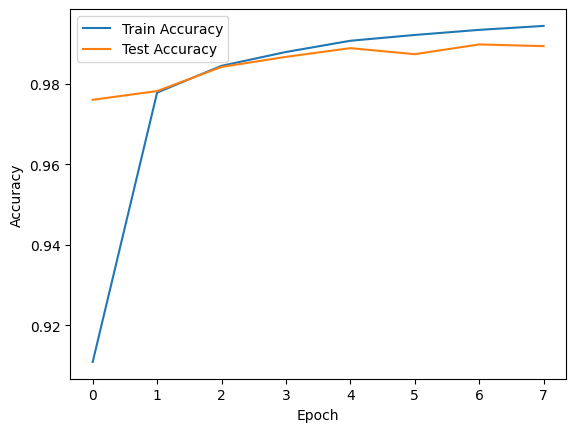

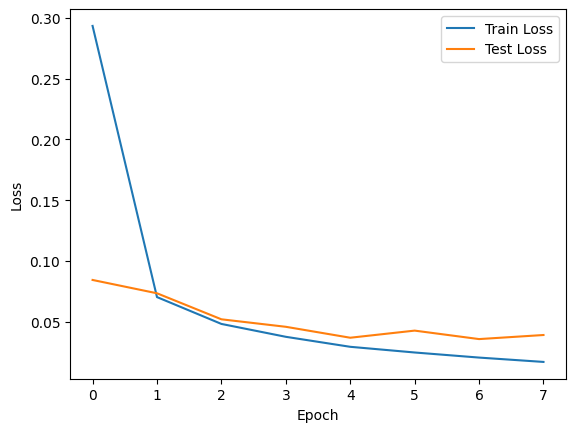

In [1]:
# Assignment 7.- Convolutional Neural Network.
# Carlos Woolrich Sorroza 2082616
# Day: Thursday
# Hour: N4-N6

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Data preprocessing
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model selection and training
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=128, validation_split=0.2)

# Plotting train and test accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting train and test loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9888 - loss: 0.0413
Test Accuracy: 0.9911999702453613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction: 4
Actual Value: 4


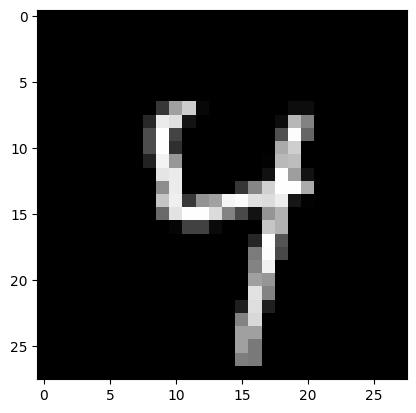

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 3
Actual Value: 3


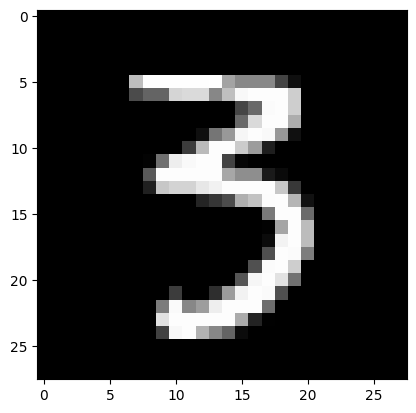

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 2
Actual Value: 2


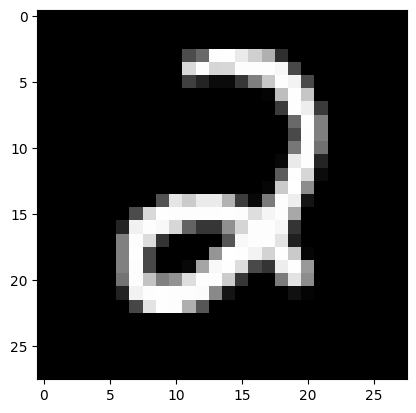

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 9
Actual Value: 9


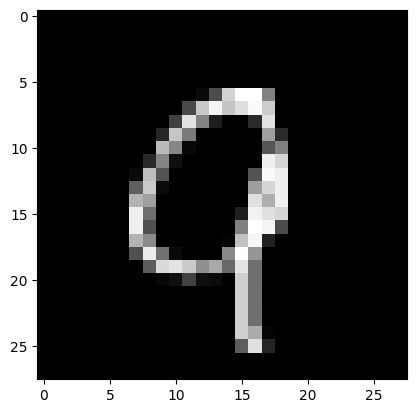

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: 9
Actual Value: 9


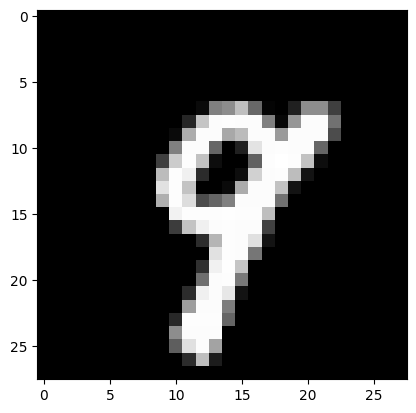

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


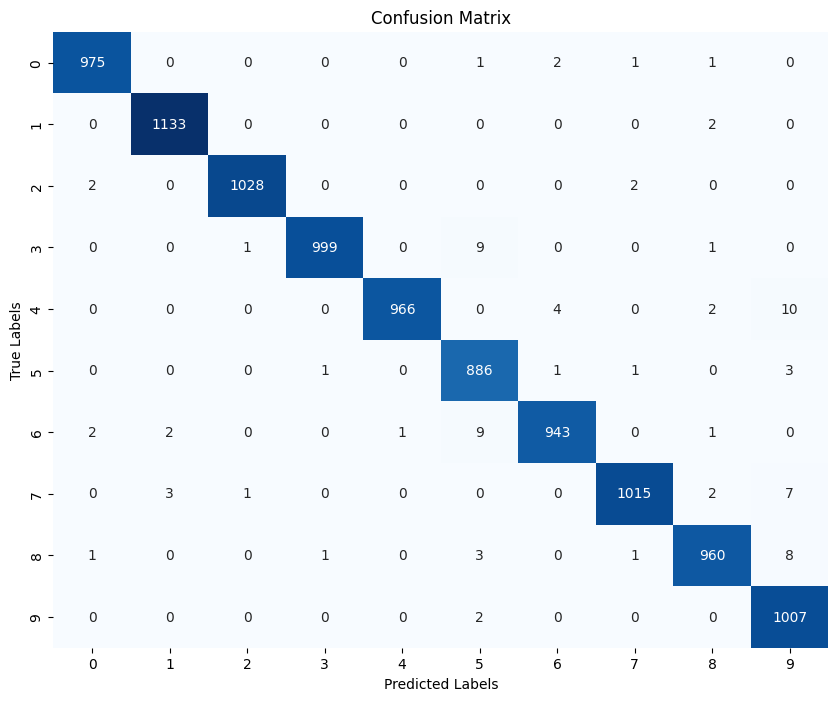

In [2]:
# Model testing
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)

# Perform 5 different predictions
for _ in range(5):
    # Choose a random index from the test dataset
    idx = np.random.randint(0, len(test_data))
    # Make prediction
    predicted_label = np.argmax(model.predict(test_data[idx:idx+1]))
    # Display prediction and actual value
    print("Prediction:", predicted_label)
    print("Actual Value:", np.argmax(test_labels[idx]))
    # Plot the image
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Confusion Matrix
predicted_labels = np.argmax(model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Questions

**How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?**

8 epochs.

**Did you get a better performance on this assignment or on assignment 6? Why?**

Yes, this assignment achieves improved performance. Convolutional Neural Networks (CNNs) typically outperform feedforward neural networks due to their ability to capture spatial hierarchies within the data through convolutional layers. These layers are adept at identifying patterns, edges, and features in images, which is essential for tasks such as image classification. Furthermore, pooling layers reduce spatial dimensions, enhancing the model's robustness to minor input variations while preserving critical features. This hierarchical feature learning enables the model to generalize more effectively, resulting in greater accuracy and reliability, particularly when working with image-based data.